In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
sns.set()

In [80]:
df = pd.read_csv('./data/audi.csv')
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2001,TT,2016,19690,Semi-Auto,30499,Petrol,165,43.5,2.0
2211,A4,2020,31995,Semi-Auto,1000,Petrol,145,40.9,2.0
1629,A3,2017,18444,Manual,18541,Petrol,30,60.1,1.4
9033,A1,2015,10899,Automatic,30854,Diesel,0,76.3,1.6
8181,A3,2015,8260,Manual,87661,Diesel,20,70.6,1.6


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


C:\Users\colin\miniconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\colin\miniconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


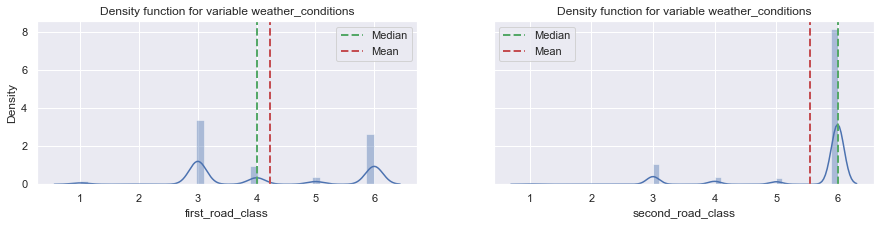

In [40]:
fig, (ax0, ax1) = plt.subplots(
    nrows=1, ncols=2, sharey = True, figsize=(15,3)
)

def plot_density(var_name, ax) :
    sns.distplot(df[var_name], ax=ax, color='b') # TODO handle warning
    ax.set(
        title = f'Density function for variable {col}', 
        # xlabel = 'custom', 
        # xlim = (0,10),
        # ylabel = 'custom', 
        # ylim = (0,10),
    )
    # TODO set labels
    ax.axvline( x = df[var_name].median(), 
        color='g', label='Median', linestyle='--', linewidth=2 )
    ax.axvline( x = df[var_name].mean(), 
        color='r', label='Mean', linestyle='--', linewidth=2 )
    ax.legend()

plot_density('first_road_class', ax0)
plot_density('second_road_class', ax1)


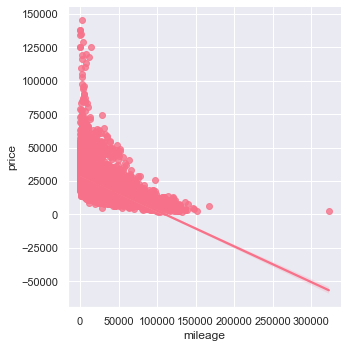

In [147]:

sns.lmplot(data = df, x='mileage', y='price', 
)

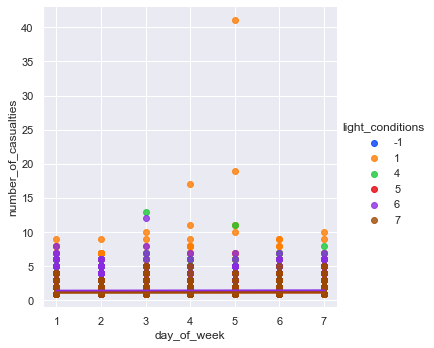

In [17]:
sns.set_palette('bright')
sns.lmplot(data = df, x='day_of_week', y='number_of_casualties', hue='light_conditions', 
)

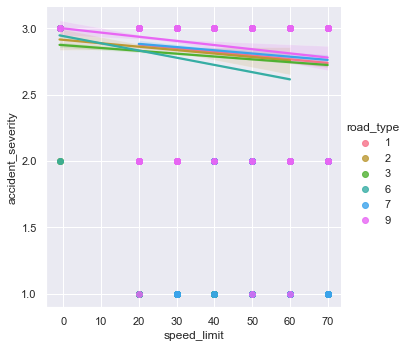

In [19]:
sns.set_palette( sns.color_palette('husl', 6))
_ = sns.lmplot(data = df, x='speed_limit', y='accident_severity', hue='road_type', 
)

<AxesSubplot:title={'center':'Residual Plot'}, xlabel='mileage', ylabel='price'>

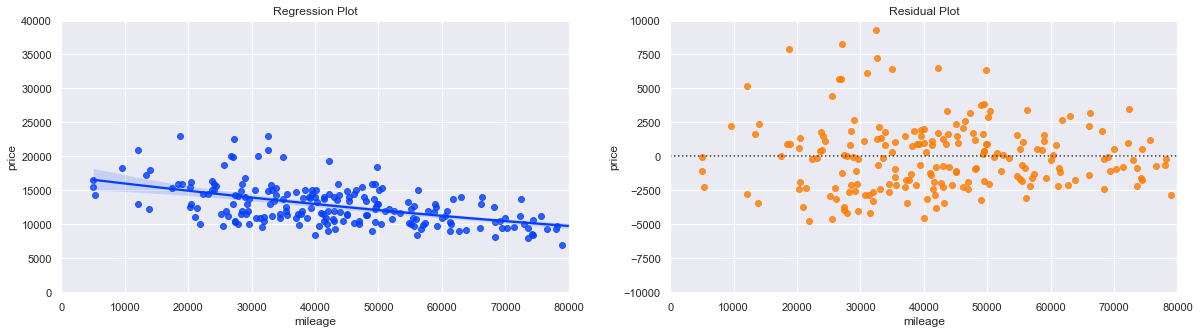

In [196]:
# Reg plot is convenient for plotting a regression line when there is a small number of values.
a3_df = df[ (df['model'] == ' A3') & (df['year'] == 2015)]

fig, (ax0, ax1) = plt.subplots(
    ncols=2, 
    figsize=(20,5), 
    sharex=True, 
)
cmap = sns.color_palette('bright')

ax0.set(
    title = 'Regression Plot',
    xlim = (0, 80 * 1000), 
    ylim = (0, 40 * 1000),
)
sns.regplot(data = a3_df, x='mileage', y='price', 
    fit_reg=True, order=3, 
    ax=ax0, color=cmap[0])

ax1.set(
    title = 'Residual Plot',
    ylim = (-10 * 1000, 10 * 1000)
)
sns.residplot(data = a3_df, x='mileage', y='price', 
    order=3,
    ax=ax1, color=cmap[1])

<AxesSubplot:title={'center':'Residual Plot'}, xlabel='mileage', ylabel='price'>

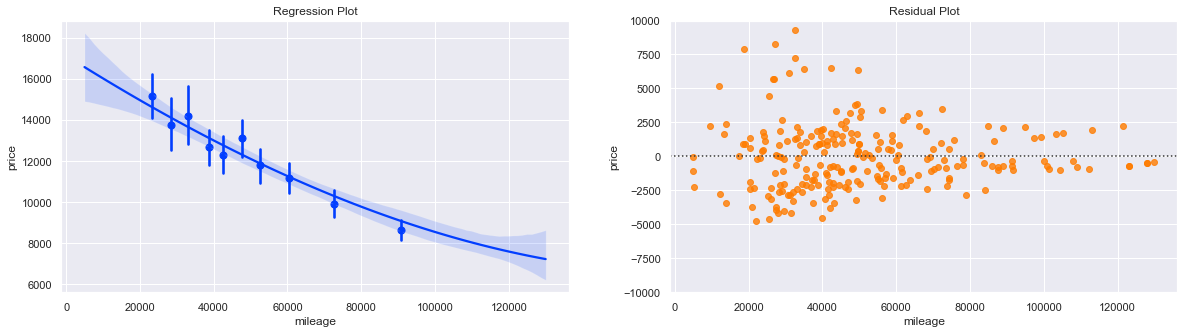

In [175]:
# For a larger number of values, it makes sense to bin the data
a3_df = df[ (df['model'] == ' A3') & (df['year'] == 2015)]

fig, (ax0, ax1) = plt.subplots(
    ncols=2, 
    figsize=(20,5), 
    sharex=True, 
)
cmap = sns.color_palette('bright')

ax0.set(
    title = 'Regression Plot',
)
sns.regplot(data = a3_df, x='mileage', y='price', 
    x_bins=10, 
    order=3, 
    fit_reg=True,
    ax=ax0, color=cmap[0])

ax1.set(
    title = 'Residual Plot',
    ylim = (-10 * 1000, 10 * 1000)
)
sns.residplot(data = a3_df, x='mileage', y='price', order=3,
    ax=ax1, color=cmap[1])

# Categorical Visualization

In [75]:
# severe_df = df[ df['pedestrian_crossing_human_control'] == 1].copy()
# severe_df = df.copy()
df['junction_detail'] = df['junction_detail'].astype('category')
df['junction_control'] = df['junction_control'].astype('category')


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


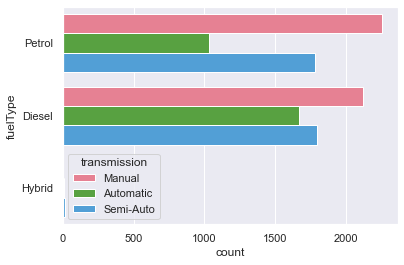

In [103]:
_ = sns.countplot(data=df,
    y='fuelType',
    hue = 'transmission',
    palette='husl',
)

In [137]:
selected_models_df.model.value_counts()
# selected_models_df.head()

 A3    1929
 A4    1381
 A1    1347
 A5     882
 A6     748
 A2       1
Name: model, dtype: int64

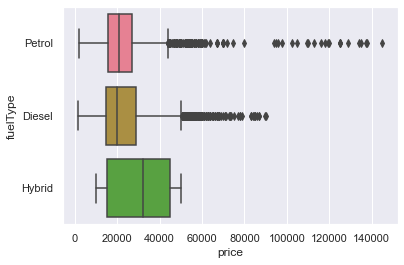

In [110]:
_ = sns.boxplot(data=df,
    y='fuelType',
    x = 'price',
    # palette='husl',
)

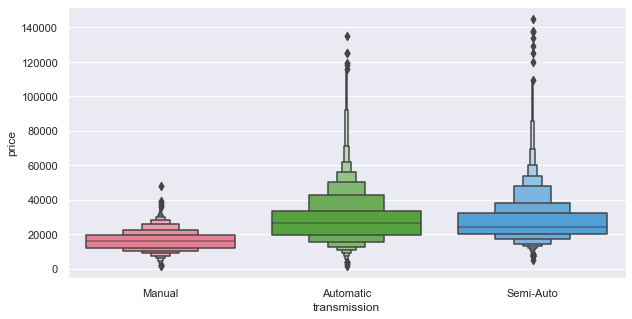

In [91]:
# This plot is best when there are a small number of categories and there is a need to plot outliers
fig, ax = plt.subplots(figsize=(10, 5))
_ = sns.boxenplot(data=df, ax = ax,
    x='transmission',
    y='price',
    palette='husl',
)

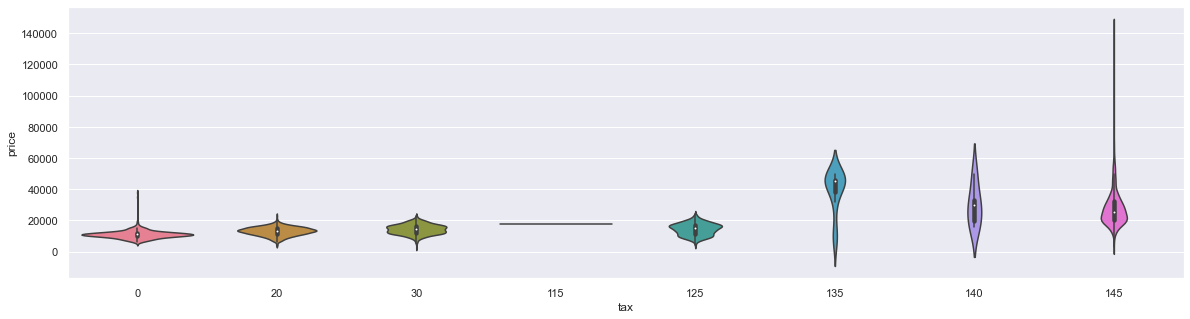

In [97]:
# Violin plots are good for a medium number of categories as they summarize the distribution of the data.  They are not good to show outliers.
low_tax_df = df[ df['tax'] < 150 ]
fig, ax = plt.subplots(figsize=(20, 5))
_ = sns.violinplot(data=low_tax_df, ax = ax,
    x='tax',
    y='price',
    palette='husl',
)

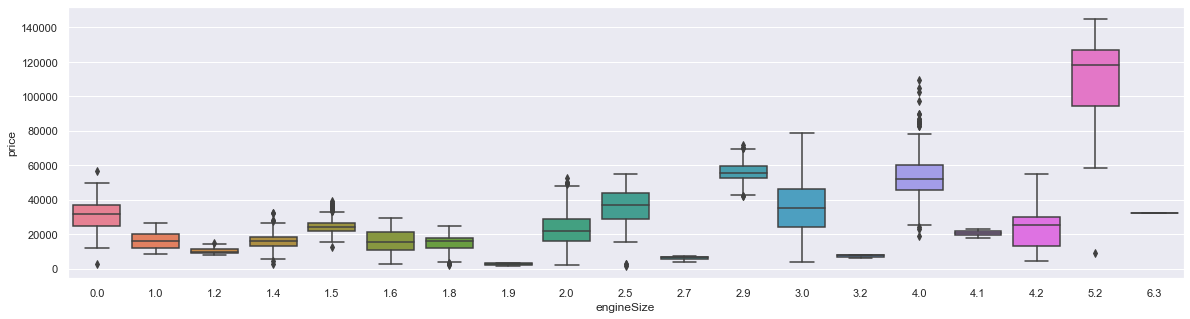

In [92]:
# Boxplots are best when there are a large number of categories as they summarize the data concisely.
fig, ax = plt.subplots(figsize=(20, 5))
_ = sns.boxplot(data=df, ax = ax,
    x='engineSize',
    y='price',
    palette='husl',
)

In [ ]:
# Swarm plot is slow
fig, ax = plt.subplots(figsize=(20, 5))
sns.swarmplot(data=severe_df, ax = ax,
         x='time',
         y='junction_control',
         hue='junction_detail')

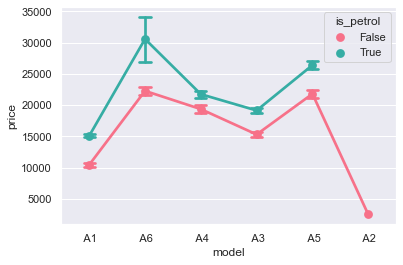

In [143]:
# Point plots show the mean value with uncertainty. 
selected_models_df = df[ df['model'].isin([' A1', ' A2', ' A3', ' A4', ' A5', ' A6']) ].copy()
selected_models_df['is_petrol'] = selected_models_df.fuelType.apply(
    lambda x : x == 'Petrol'
)
_ = sns.pointplot(data=selected_models_df,
    x ='model',
    y = 'price',
    capsize = 0.2,
    hue = 'is_petrol',
    palette='husl',
)

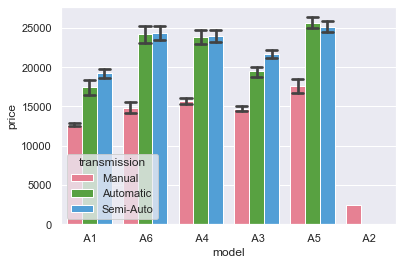

In [139]:
# Bar plots also show the mean value, they are easier to read when the means are close.  
_ = sns.barplot(data=selected_models_df,
    x ='model',
    y = 'price',
    capsize = 0.2,
    hue = 'transmission',
    palette='husl',
)